In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from category_encoders import MEstimateEncoder, CatBoostEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import  ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv(r'D:\ml-baru\pg2\Playground-MentalHealth\data\processed\trainResik.csv')
df

,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,5.0,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,5.0,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,3.0,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,5.0,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [5]:
df.isna().sum() / len(df) * 100

Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Work Pressure                            19.842217
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                                0.000000
dtype: float64

In [8]:
na_cols = []

for col in df.columns:
    if df[col].isna().sum() > 0:
        na_cols.append(col)

In [10]:
df[na_cols].dtypes

Profession           object
Work Pressure       float64
Job Satisfaction    float64
Dietary Habits       object
Degree               object
Financial Stress    float64
dtype: object

### Bit,,, EDA

In [18]:
df['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

In [17]:
df[na_cols].nunique()

Profession           64
Work Pressure         5
Job Satisfaction      5
Dietary Habits       23
Degree              115
Financial Stress      5
dtype: int64

In [14]:
numerical_cols = df[na_cols].select_dtypes('float')

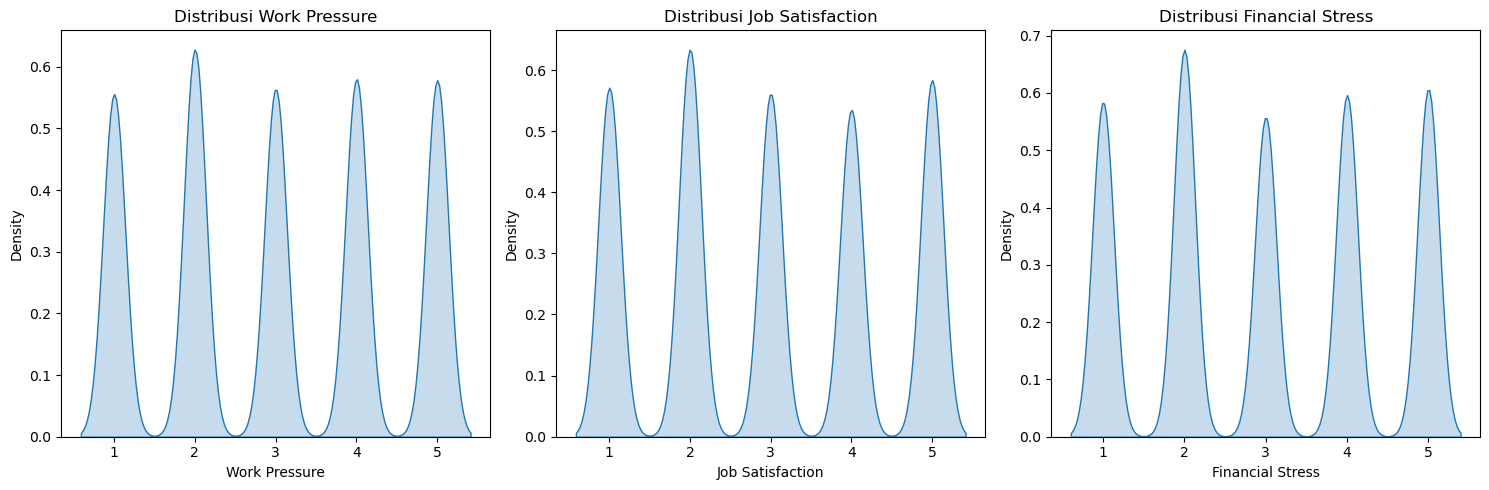

In [16]:
plt.figure(figsize=(15, 5))  # Mengatur ukuran figure

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)  # Membuat subplot
    sns.kdeplot(df[col], fill=True)  # Membuat kdeplot
    plt.title(f'Distribusi {col}')  # Menambahkan judul

plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
plt.show()  # Menampilkan plot

# Train test splitting

In [6]:
X = df.drop(columns='Depression')
y = df['Depression']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((98490, 15), (42210, 15), (98490,), (42210,))

# Lets preprocessing begin

In [37]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col != 'Depression']
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']

In [38]:
num_cols

['Age',
 'Work Pressure',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress']

In [39]:
cat_cols

['Name',
 'Gender',
 'City',
 'Working Professional or Student',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

In [40]:
len(num_cols+cat_cols)

15

In [47]:
num_pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()),
    ('transformer',PowerTransformer(method='yeo-johnson'))
])

cat_pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [48]:
# mixin to 1 pipe for preprocessor
prep_pipe = ColumnTransformer([
    ('treat_num',num_pipe,num_cols),
    ('treat_cat',cat_pipe,cat_cols)
])
prep_pipe

ColumnTransformer(transformers=[('treat_num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler()),
                                                 ('transformer',
                                                  PowerTransformer())]),
                                 ['Age', 'Work Pressure', 'Job Satisfaction',
                                  'Work/Study Hours', 'Financial Stress']),
                                ('treat_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Name', 'Gender', 'City',
                                  'Working Professional or Student',
                                  'Profession', 'Sleep Duration',
                                  'Dietary Habits', 'Degree',
                                  'Have you ever had suicidal thoughts ?',
                                  'Family History of Mental Illness'])])

In [49]:
# mixin jadi pipe gede
logmodel = Pipeline([
    ('preprocess',prep_pipe),
    ('model',LogisticRegression())
])
logmodel

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('treat_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('transformer',
                                                                   PowerTransformer())]),
                                                  ['Age', 'Work Pressure',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours',
                                                   'Financial Stress']),
                                                 ('treat_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Name', 'Gender', 'City',
                                                   'Working Professional or '
                                                   'Student',
                                                   'Profession',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Family History of Mental '
                                                   'Illness'])])),
                ('model', LogisticRegression())])

In [50]:
X_train

,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
103352,Himani,Female,40.0,Surat,Working Professional,Chef,1.0,5.0,5-6 hours,Unhealthy,BHM,No,7.0,5.0,Yes
120701,Kiran,Female,23.0,Surat,Student,NaN,NaN,NaN,Less than 5 hours,Moderate,BSc,Yes,8.0,5.0,Yes
35261,Chhavi,Female,38.0,Visakhapatnam,Working Professional,Entrepreneur,5.0,4.0,More than 8 hours,Unhealthy,MCA,Yes,3.0,4.0,Yes
97019,Aarav,Male,18.0,Ahmedabad,Working Professional,NaN,4.0,2.0,7-8 hours,Healthy,Class 12,No,0.0,2.0,Yes
42739,Arya,Male,24.0,Ghaziabad,Working Professional,Teacher,5.0,5.0,5-6 hours,Healthy,B.Arch,No,6.0,2.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,Anushka,Female,46.0,Kanpur,Working Professional,Accountant,2.0,2.0,Less than 5 hours,Moderate,M.Com,Yes,11.0,2.0,No
119879,Jiya,Female,42.0,Vasai-Virar,Working Professional,Manager,4.0,1.0,Less than 5 hours,Moderate,MHM,Yes,2.0,1.0,No
103694,Aishwarya,Female,19.0,Ludhiana,Working Professional,NaN,5.0,2.0,7-8 hours,Moderate,Class 12,Yes,10.0,5.0,Yes
131932,Saanvi,Female,19.0,Rajkot,Working Professional,NaN,5.0,5.0,7-8 hours,Unhealthy,Class 12,No,12.0,3.0,No


In [51]:
df.columns

Index(['Name', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [52]:
logmodel.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('treat_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('transformer',
                                                                   PowerTransformer())]),
                                                  ['Age', 'Work Pressure',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours',
                                                   'Financial Stress']),
                                                 ('treat_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Name', 'Gender', 'City',
                                                   'Working Professional or '
                                                   'Student',
                                                   'Profession',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Family History of Mental '
                                                   'Illness'])])),
                ('model', LogisticRegression())])

In [53]:
y_pred = logmodel.predict(X_test)
score = f1_score(y_test,y_pred)
print(f'score dari logreg adalah: {score}')

score dari logreg adalah: 0.8049511400651466


## coba ganti pake model lain yaitu XGB

In [54]:
# mixin jadi pipe gede
xgbmodel = Pipeline([
    ('preprocess',prep_pipe),
    ('model',XGBClassifier())
])
xgbmodel

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('treat_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('transformer',
                                                                   PowerTransformer())]),
                                                  ['Age', 'Work Pressure',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours',
                                                   'Financial Stress']),
                                                 ('treat_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_fr...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [55]:
xgbmodel.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('treat_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('transformer',
                                                                   PowerTransformer())]),
                                                  ['Age', 'Work Pressure',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours',
                                                   'Financial Stress']),
                                                 ('treat_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_fr...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [56]:
y_pred = xgbmodel.predict(X_test)
score = f1_score(y_test,y_pred)
print(f'score dari xgboost adalah: {score}')

score dari xgboost adalah: 0.8057581821702924
